# 주성분 분석(PCA : Principal Component Analysis)
- 4차원의 데이터를 소차원의 데이터로 환원시키는 기법

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열로 변경하기
fruits_2d = fruits.reshape(-1 , 100*100)
fruits_2d.shape

(300, 10000)

# PCA 모델 구성하기

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 300개의 데이터중 구별이 확실한 주성분 50개 선택 (Feature들 중 특징을 포함하여 구성)
# 뚜렷한 컬럼과 , 뚜렷한 row만 선택한다. 새로운 row 생성
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [7]:
# 시각화 함수
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
    n = len(arr) # n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기, 샘플 갯수를 10으로 나누어 전체 행 갯수 계산
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개이면 열 갯수가 샘플갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    
    fig,axs = plt.subplots(rows ,cols, figsize=(cols*ratio,rows*ratio), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n: # n개까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

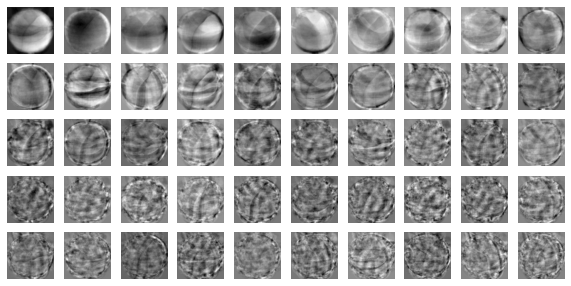

In [8]:
draw_fruits(pca.components_.reshape(-1,100,100))
# 50 / 3 = 16 16개씩 사과의 특성이 진한것들, 파인애플 특성이 진한것들, 바나나의 특성이 진한것들이 있을 것이다.

In [10]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본의 크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 20분의 1로 줄임

(300, 10000)
(300, 50)


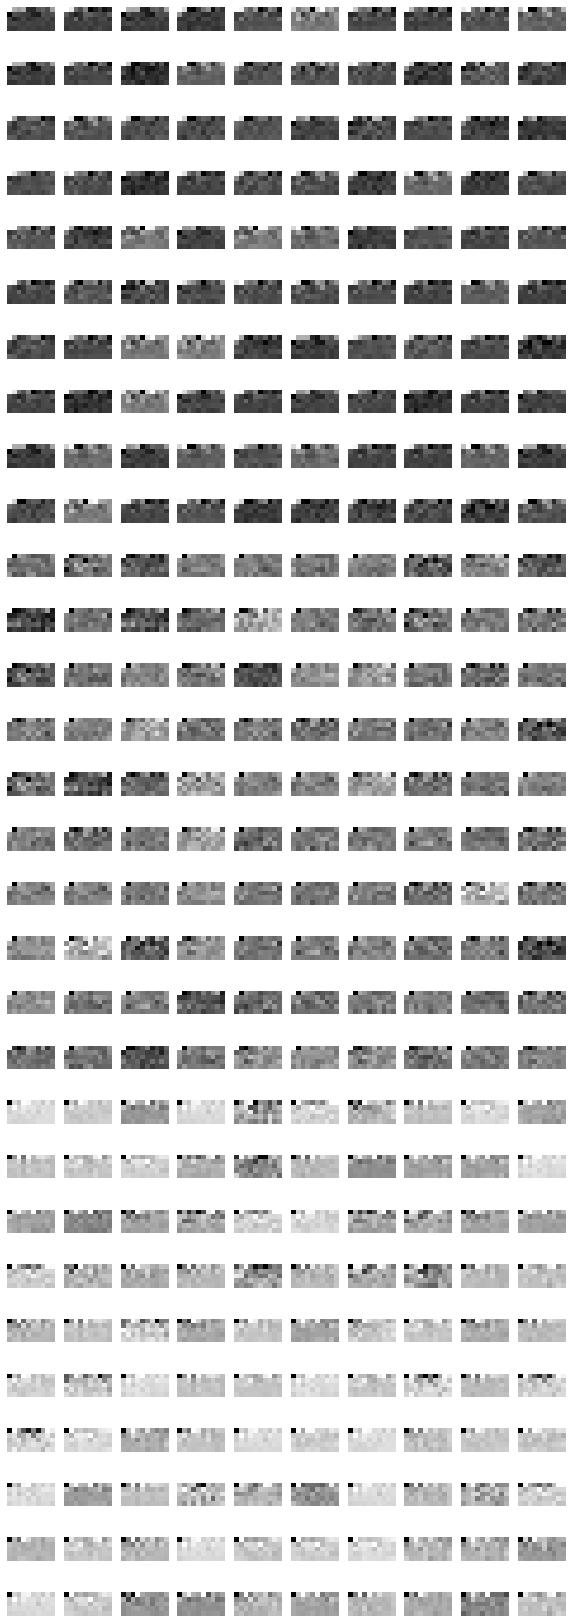

In [16]:
draw_fruits(fruits_pca.reshape(-1 , 5 ,10)) # (5,10)은 컬럼 50을 나눈것 X해서 50이 나오면 된다. 극단적으로 25,2도 가능  
# 사과, 파인애플, 바나나 의 특성을 잡은것  
# -> 딥러닝에서 CNN으로 바뀐다. 
# 이미지에서 특징들만 뽑아낸것

---
### 원본 데이터 재구성
위에서 인코딩 한것을 디코딩 해본다

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [13]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

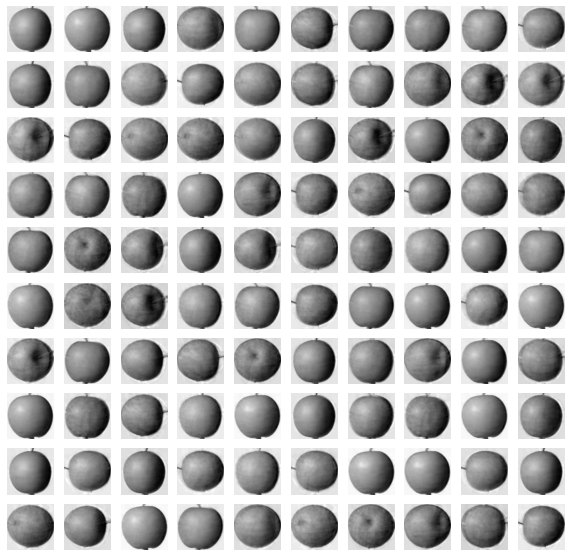

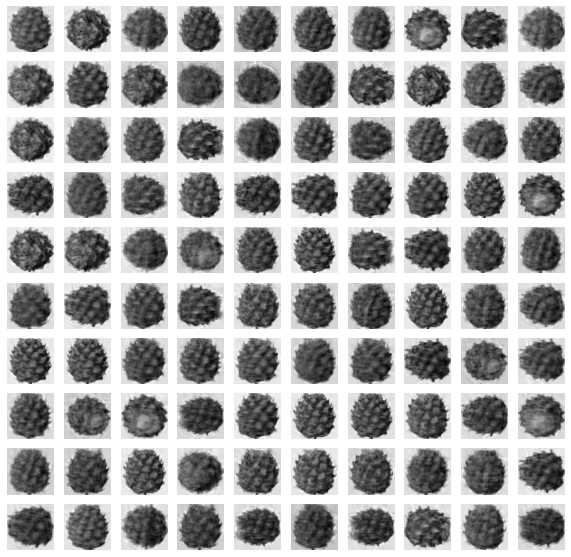

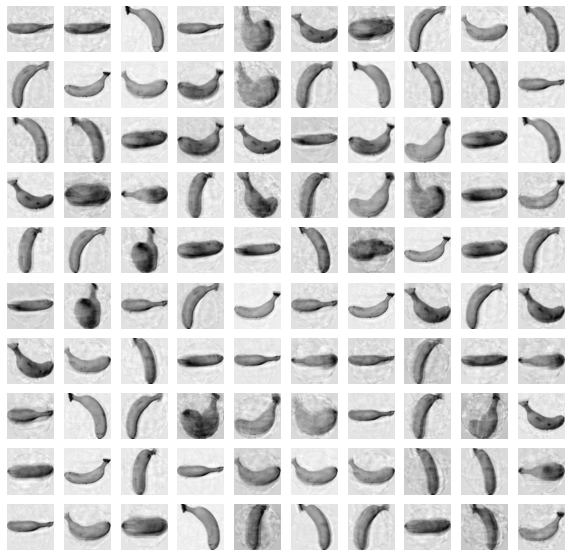

In [15]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

> 1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

---
# 설명된 분산
: 주성분으로 구성할때 원본 데이터의 분산을 어느정도 유지하고 있었는지 확인하는 방법 (이미지의 분산 = 이미지의 크기)
(정확도)

In [20]:
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터
# 92% 정도 복원되었다.

0.922359420547012

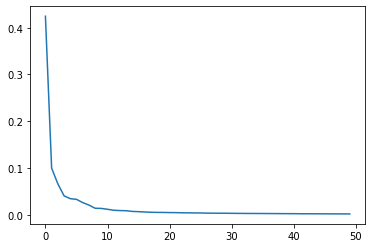

In [35]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 0.0 = 100% , y 축 = 오차율

> 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다.

---
# 주성분을 10개만 정의해서 해보자

In [22]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [23]:
# 축소된 차원 크기 확인하기
pca10.components_.shape

(10, 10000)

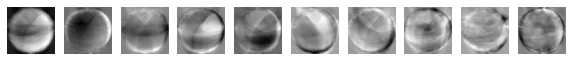

In [25]:
draw_fruits(pca10.components_.reshape(-1,100,100))

In [26]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 10개의 주성분으로 변경하기
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape) # 20분의 1로 줄임

(300, 10)


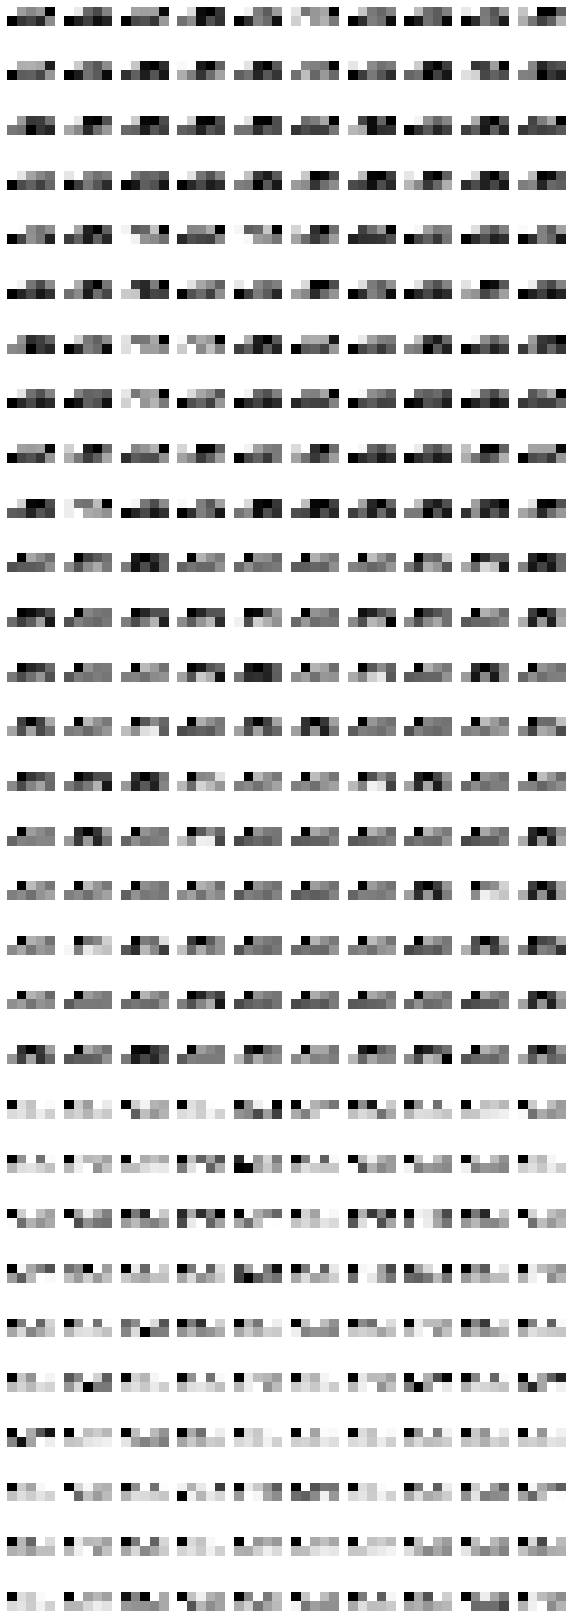

In [28]:
draw_fruits(fruits_pca10.reshape(-1 , 2 , 5)) 

In [30]:
fruits_inverse10 = pca10.inverse_transform(fruits_pca10)
print(fruits_inverse10.shape)

(300, 10000)


In [31]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct10 = fruits_inverse10.reshape(-1,100,100)
fruits_reconstruct10.shape

(300, 100, 100)

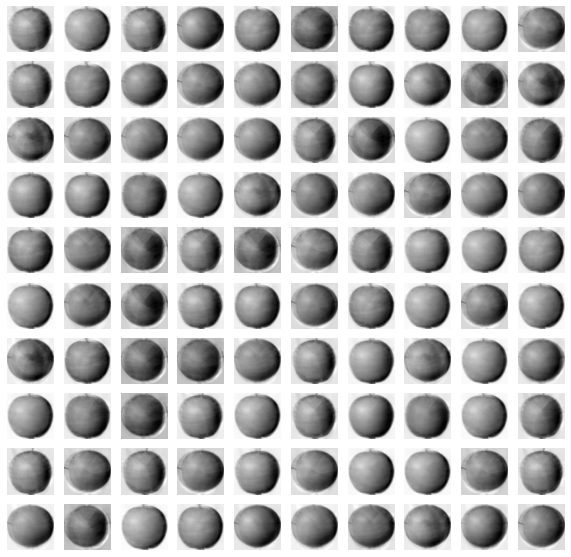

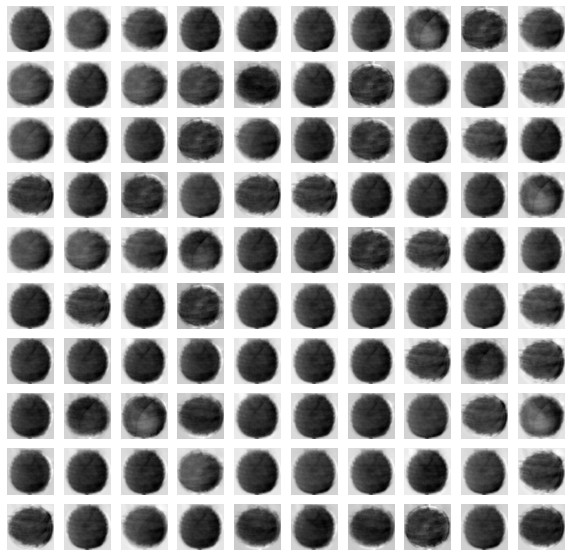

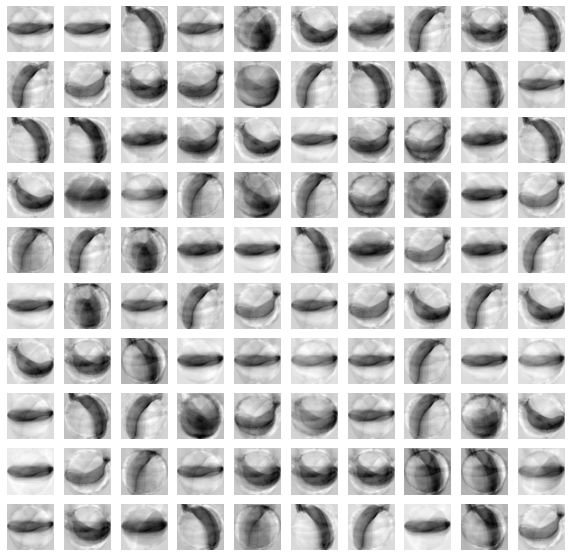

In [32]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct10[start:start+100])
    print("\n")

In [33]:
np.sum(pca10.explained_variance_ratio_) # 77%

0.7711096082658346

---
# 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요하다
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# 교차검증 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr , fruits_2d , target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.42125539779663085


> 정확도는 99.7% 정도 이며, 계산에 필요한 시간은 0.4초 정도 나왔다.

In [43]:
# 300 * 50으로 구성된 주성분 분석으로 구성된 데이터로 확인
scores = cross_validate(lr, fruits_pca , target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03404541015625


> 정확도는 100% 정도이며 계산에 필요한 시간은 0.03초 정도이다.

시간이 훨씬 줄어들었다

In [44]:
scores

{'fit_time': array([0.04068923, 0.02562904, 0.0301578 , 0.02216077, 0.0515902 ]),
 'score_time': array([0.00070572, 0.00028801, 0.00034094, 0.00028706, 0.00028706]),
 'test_score': array([1., 1., 1., 1., 1.])}

---
# 주성분 분석의 분산의 크기를 정해 사용하기

In [48]:
pca = PCA(n_components= 0.5 ) # n_components를 실수로 입력하면 분산의 percentage 정도로 나타낸다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [50]:
print(pca.n_components_)
# Feature가 2개만 있어도 50%를 맞출수 있다

2


> 필요한 주성분 Feature 를 2개로 사용   
> 주성분 2개면 그래프로 표현이 가능하다.

In [51]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [52]:
# 교차검증으로 확인
scores = cross_validate(lr, fruits_pca , target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03375444412231445


> 정확도는 99.3%이며, 계산 시간은 0.03초 이다.

In [54]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)

# 데이터 프레임 구성
import pandas as pd
pcaDf = pd.DataFrame(data =pcaComponents, columns=['PCA1','PCA2'])
pcaDf.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


> 지도학습은 정확도가 아주 높다

---
# K-Means에 주성분 분석 적용해 보기 (비지도 학습)

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3 , random_state=42)
km.fit(fruits_pca) # PCA데이터로 (컬럼 2개) fit 해본다

KMeans(n_clusters=3, random_state=42)

In [56]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_ , return_counts= True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

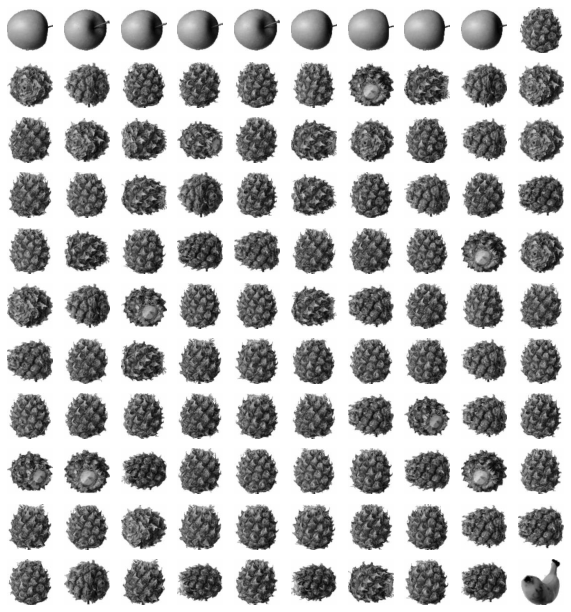

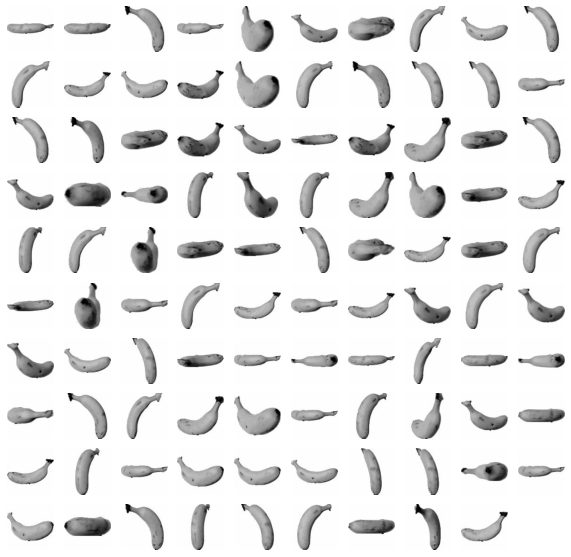

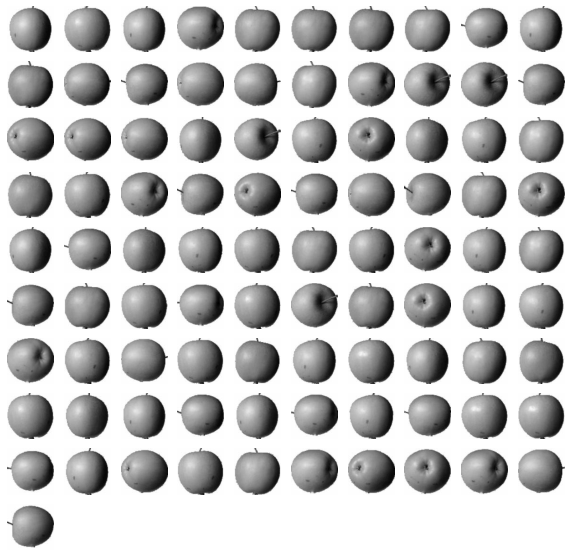

In [57]:
# 그림으로 확인하기
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

---
# 산포도로 확인해보기

<img src="../Data/fruitshist.png" width="500">

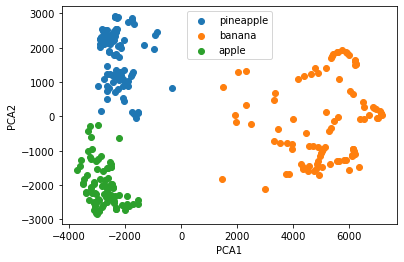

In [59]:
for label in range(3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0] , data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

딥러닝 Convolutional : 특징점 찾기 -> CNN

---